# Color Identification in Images
&emsp;A monitor or TV screen basically generates three types of colors, i.e., red, green, and yellow. But the combination and intensities of these three colors make various colors. Thus, each color has its unique HSV color code. For finding the specified color in the given image, we need to use the lower and upper bound of that color.

&emsp;The image that we are going to use is taken from tech-with-tim GitHub repo [OpenCV Tutorials](https://github.com/techwithtim/OpenCV-Tutorials)

![](https://raw.githubusercontent.com/techwithtim/OpenCV-Tutorials/main/assets/soccer_practice.jpg)

In [5]:
import os # provides functions for interacting with the operating system
import cv2 # designed to solve computer vision problems
import numpy as np # number manupulation library
import matplotlib.pyplot as plt # used for plotting 
from collections import Counter # subclass for counting hashable objects
from sklearn.cluster import KMeans # K means method in Sklearn
from skimage.color import rgb2lab, deltaE_cie76 # Scikit image module

## Loading the image 

The type of this input is <class 'numpy.ndarray'>
Shape: (1119, 1200, 3)


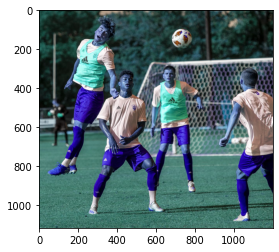

In [26]:
image = cv2.imread('soccer_practice.jpg') # loading put image
print(f"The type of this input is {type(image)}") # printing object type
print(f"Shape: {image.shape}") # printing the shape of the image
plt.imshow(image) # plotting the image 
plt.show() # removing the unnecessary things

&emsp;The color of the image looks a bit off. This is because, by default, OpenCV reads image in the sequence Blue Green Red (BGR). Thus, to view the actual image we need to convert the rendering to Red Green Blue (RGB).


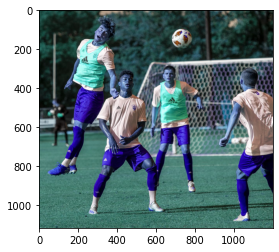

In [28]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converting BGR to RGB
plt.imshow(image) # plotting the image
plt.show() # removing the unnecessary things

## Detecting Color

In [10]:
# a function to convert RGB to hex
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [11]:
# a function to load the image
def get_image(image_path):
    image = cv2.imread(image_path) # loading the image specified by path
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB 
    return image # return the image

In [14]:
# a function to extract the top colors from the image and display them as a pie chart
def get_colors(image, number_of_colors, show_chart):
    """
        This function will take three arguments 
            1. image: The image whose colors we wish to extract.
            2.number_of_colors: Total colors we want to extract.
            3.show_chart: A boolean that decides whether we show the pie chart or not 
    
    """
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA) # modifying the image 
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3) # reshaping the image
    
    # It is not required to resize it to a smaller size but we do so to lessen the pixels 
    # which’ll reduce the time needed to extract the colors from the image
    
    clf = KMeans(n_clusters = number_of_colors) # intializing the classifier
    labels = clf.fit_predict(modified_image) # predict the modified image
    
    counts = Counter(labels) # determine the count

    center_colors = clf.cluster_centers_ # obtain the cluster centers
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()] # obtain the colors
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()] # getting the hex values
    rgb_colors = [ordered_colors[i] for i in counts.keys()] # getting the RGB values

    # plotting the n colors
    if (show_chart):
        plt.figure(figsize = (8, 6)) # settingn the figure size
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors) # plotting the pie chart

    return rgb_colors

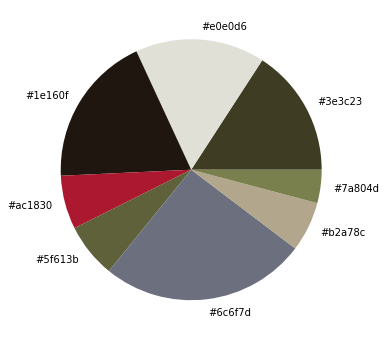

In [19]:
# getting the colors in our image
get_colors(get_image("soccer_practice.jpg"), 8, True)

We’ve just identified the majority 8 colors that exist in our image.